## Винные обзоры

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [1]:
# импортируем необходимые пакеты

import pandas as pd
import seaborn as sns

In [2]:
# загружаем датасет
import os

os.chdir(r'C:\Users\VEZem\Desktop\new\LearnPandas\data')
data = pd.read_csv('ds_salaries.csv')
data.head()
df = pd.read_csv('wine.csv') # чтение данных

FileNotFoundError: [Errno 2] No such file or directory: 'wine.csv'

### Задание 5.1

Составьте чек-лист всех этапов жизненного цикла модели машинного обучения для создания ИИ-сомелье. 
Подробно раскройте процесс разведывательного анализа данных с подэтапами. 


* Определение бизнес-проблемы
* Сбор данных
* Очистка данных от пропусков/выбросов/аномалий
* Разведывательный анализ данных
    + проектирование признаков (генерация из внешних источников данных, из признаков датасета)
    + кодирование признаков
    + проверка статистических гипотез
    + отбор признаков
* Разработка модели
* Вывод модели в продакшн


### Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки

In [ ]:
df.nunique() # смотрим на кол-во уникальных признаков

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [ ]:
df.info() # посмотрим на типы признаков. Претендента всего 2: points, price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Смотрим на описание признаков и на распределение, чтобы точно убедиться, что они числовые:

array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

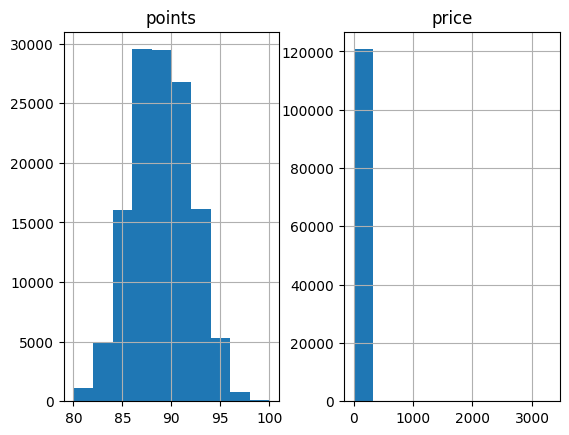

In [ ]:
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = df.hist()
hist

Ответ: points, price

### Задание 5.3

Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их. 
В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить. 


In [ ]:
mask = df.duplicated(subset=df.columns) # маска для фильтрации
data_duplicates = df[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 9983


### Задание 5.4

Проверьте датасет на наличие пропусков в данных.
В каких из представленных признаках были обнаружены пропуски?


In [ ]:
df.info() # смотрим краткую информацию о наборе данных и даем ответ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### Задание 5.5

Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в  PYTHON-14. Очистка данных:

Воспользуйтесь правилами:
    
+ Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
+ Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
+ Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.


<Axes: >

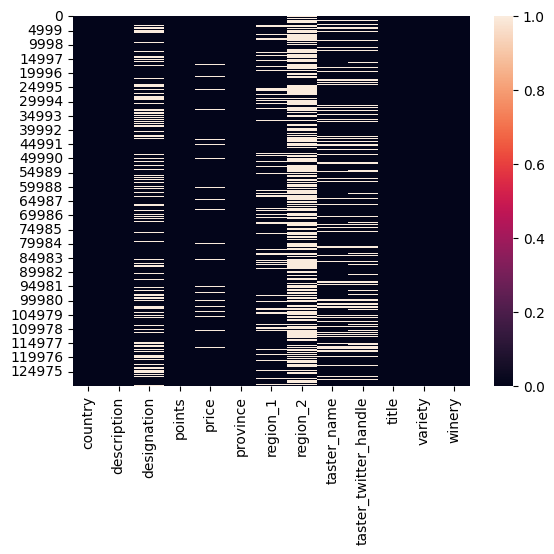

In [ ]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

In [ ]:
df = df.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

<Axes: >

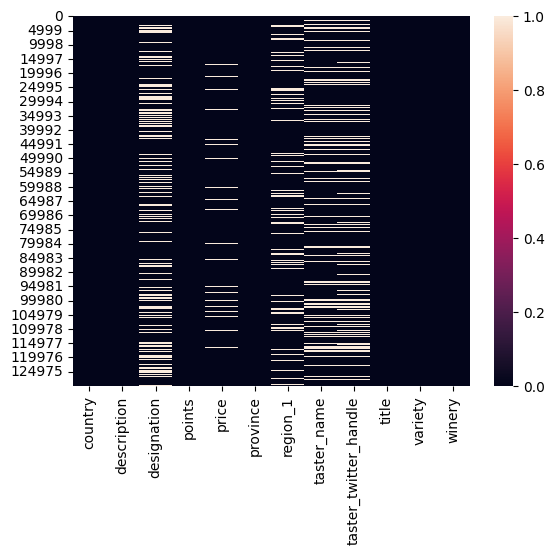

In [ ]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [ ]:
df.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1                  NaN          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree                   NaN   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [ ]:
df.describe(include='all')

country                                        description designation  \
count   129908                                             129971       92506   
unique      43                                             119955       37979   
top         US  Seductively tart in lemon pith, cranberry and ...     Reserve   
freq     54504                                                  3        2009   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1 taster_name  \
count   129971.000000  120975.000000      129908       108724      103727   
unique            NaN            NaN         425         1229          19   
top               NaN            NaN  California  Napa Valley  Roger Voss   
freq              NaN            NaN       36247         4480       25514   
mean        88.447138      35.363389         NaN          NaN         NaN   
std          3.039730      41.022218         NaN          NaN         NaN   
min         80.000000       4.000000         NaN          NaN         NaN   
25%         86.000000      17.000000         NaN          NaN         NaN   
50%         88.000000      25.000000         NaN          NaN         NaN   
75%         91.000000      42.000000         NaN          NaN         NaN   
max        100.000000    3300.000000         NaN          NaN         NaN   

       taster_twitter_handle  \
count                  98758   
unique                    15   
top               @vossroger   
freq                   25514   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                                    title     variety  \
count                                              129971      129970   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                   11       13272   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               129971  
unique               16757  
top     Wines & Winemakers  
freq                   222  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [ ]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [ ]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

<Axes: >

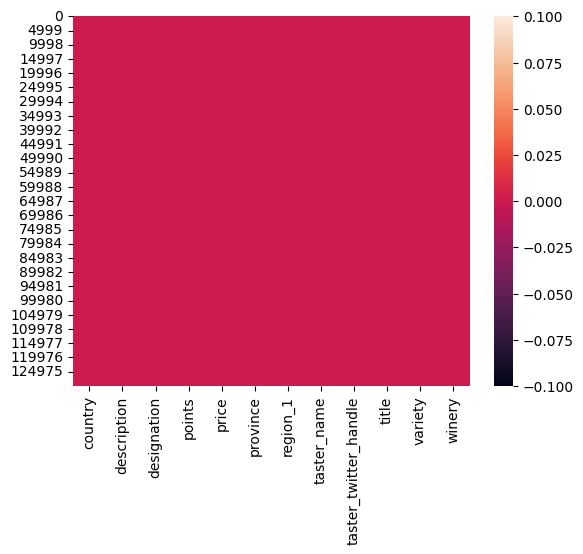

In [ ]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [ ]:
df = df.to_csv('wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('wine_cleared.csv')

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv('wine.csv')

ModuleNotFoundError: No module named 'sweetviz'

In [ ]:
report = sv.analyze(df)
report.show_html()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [ ]:
import pandas as pd
import dtale

df = pd.read_csv('wine.csv')

In [ ]:
d = dtale.show(df)
d

In [ ]:
df = pd.read_csv('wine_cleared.csv')
df.head()

print(df['price'].min())


4.0


In [ ]:
import statistics
print(df['price'].mean())

35.363389129985535


In [ ]:
sum(df['price']) / len(df['price'])

35.36338912999136

2023-08-14 16:52:19,588 - INFO     - Executing shutdown due to inactivity...
2023-08-14 16:52:31,861 - INFO     - Executing shutdown...
2023-08-14 16:52:31,870 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Valera\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Valera\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Valera\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Valera\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.e

In [ ]:
print(df['price'].median())

28.0


In [ ]:
df.sort_values('price')
print(len(df['price']))
print(len(df['price'])%2)
m = len(df['price']) // 2
median = (df['price'][m // 2] + df['price'][(m - 1) // 2]) / 2
print(median)


129971
1
80.0


In [ ]:
print(df['price'].mode())

0    35.363389
Name: price, dtype: float64


In [ ]:
df['price'].corr(df['points'])

0.40213688263716135

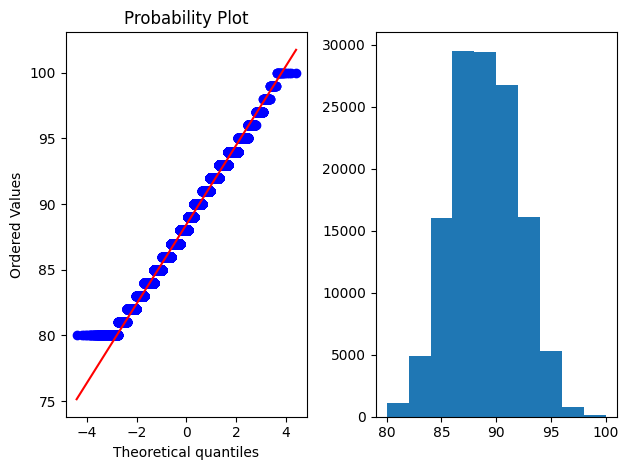

In [ ]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [ ]:
df['price'].corr(df['points'],method = 'kendall')


0.433497561218535

In [ ]:
from sklearn.metrics import matthews_corrcoef


x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [ ]:
df = pd.read_csv('wine_cleared.csv')
df.head()



country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

<Axes: >

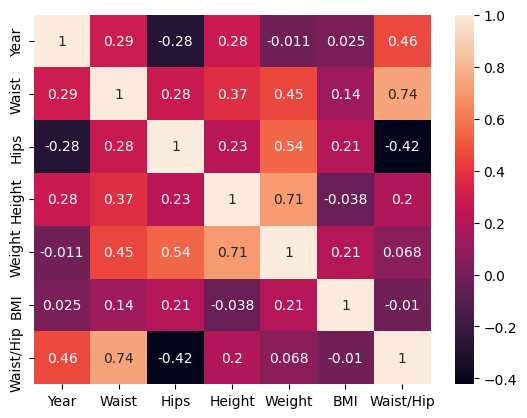

In [ ]:
model = pd.read_csv('model.csv')
model.head()
del model[model.columns [0]]
model.head()
model.corr()
sns.heatmap(model.corr(), annot = True)



In [ ]:
%pwd

'c:\\Users\\Valera\\IDE'

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

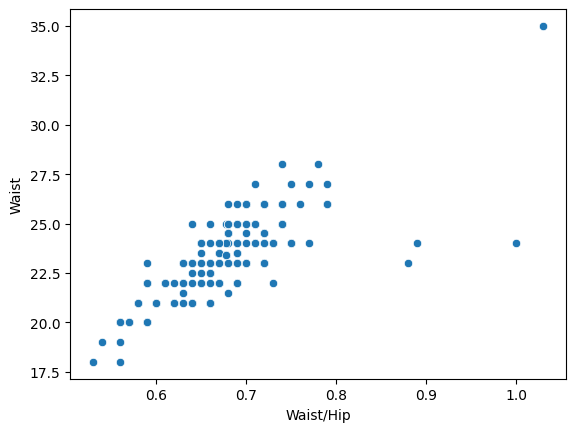

In [ ]:
sns.scatterplot(data=model, x="Waist/Hip", y="Waist")

c:\Users\Valera\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


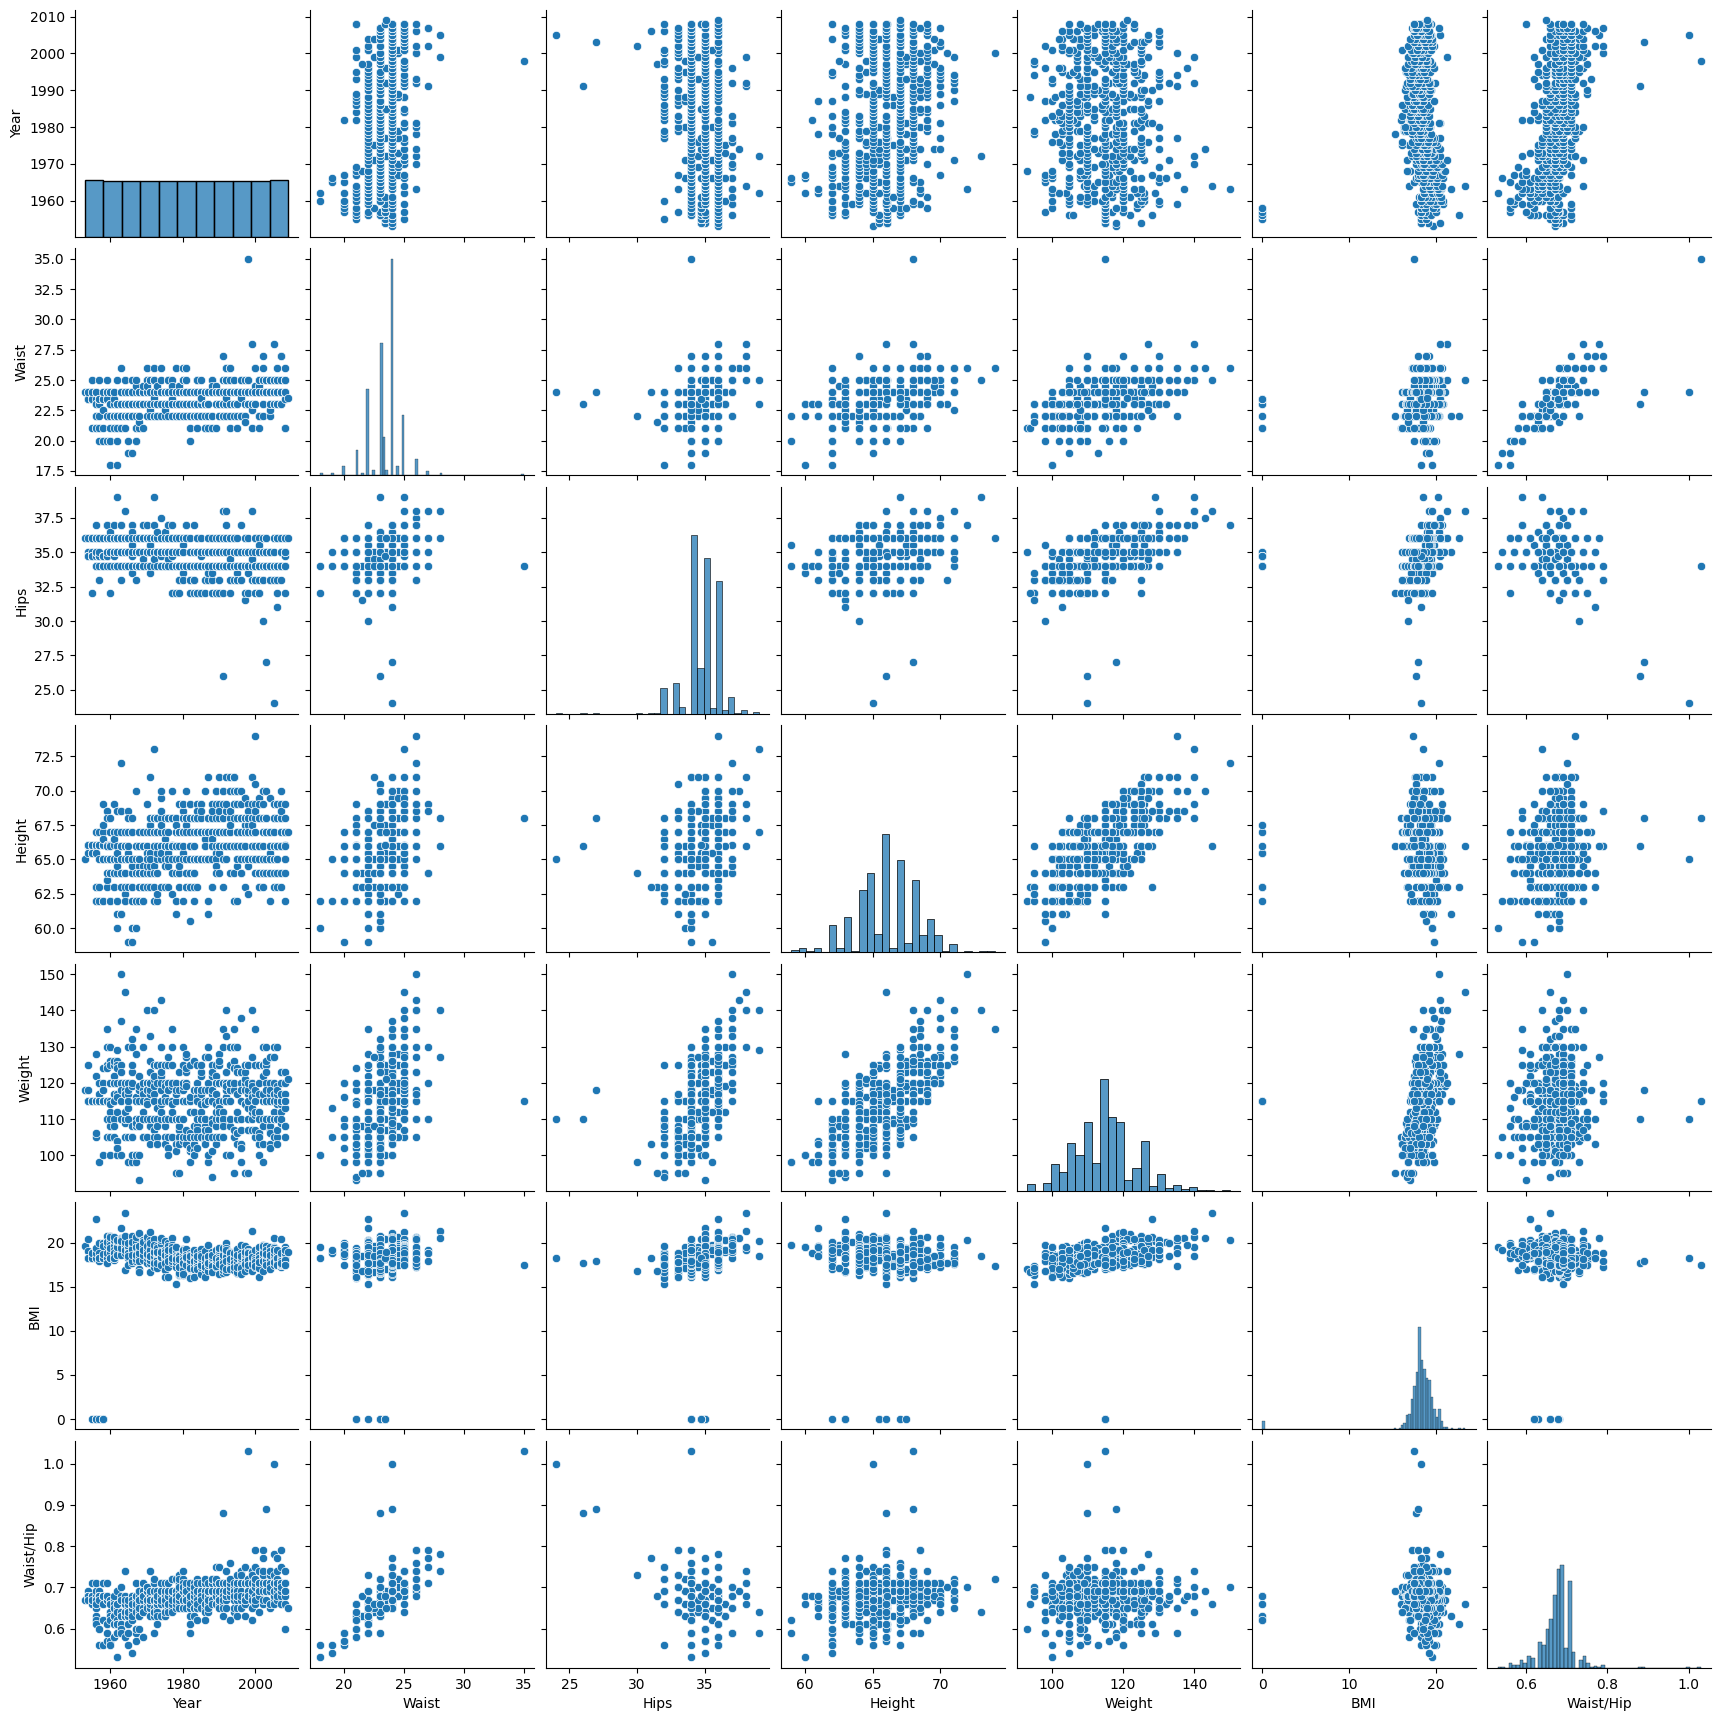

In [ ]:
sns.pairplot(model)

In [ ]:
model['Weight'].corr(model['Height'])

0.7065690261409538

In [ ]:
model['Weight'].mean()
model['Height'].mean()

66.05725806451613

In [ ]:
data = pd.read_csv('wine_cleared.csv')
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [ ]:
data['price_round'] = data['price'].round().astype(int)
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round  
0              Nicosia           35  
1  Quinta dos Avidagos           15  
2            Rainstorm           14  
3           St. Julian           13  
4         Sweet Cheeks           65

In [ ]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round  year  is_usa  
0              Nicosia           35  2013       0  
1  Quinta dos Avidagos           15  2011       0  
2            Rainstorm           14  2013       1  
3           St. Julian           13  2013       1  
4         Sweet Cheeks           65  2012       1

In [ ]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['is_france'].sum()
data['is_italy'].sum()
data['year'] = data['year'].apply(lambda x: int(x) if type(x) == str else x)


# создаем новый признак и считаем сумму
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)
print(data['old_wine'].sum())

39781


In [ ]:
data['country'].value_counts()

country
US                        54567
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [ ]:
import re
s = "oт топота копыт пыль по полю летит"
match = re.search(r'по', s)
print( match.group(), sep='\n')

по


In [ ]:
regex = "\((.*?)\)" 
data['locality'] = data['title'].str.findall(regex).str.get(0)
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round    year  is_usa  is_france  is_italy  \
0              Nicosia           35  2013.0       0          0         1   
1  Quinta dos Avidagos           15  2011.0       0          0         0   
2            Rainstorm           14  2013.0       1          0         0   
3           St. Julian           13  2013.0       1          0         0   
4         Sweet Cheeks           65  2012.0       1          0         0   

   old_wine             locality  
0         0                 Etna  
1         0                Douro  
2         0    Willamette Valley  
3         0  Lake Michigan Shore  
4         0    Willamette Valley

In [ ]:
import pandas as pd
country_population = pd.read_csv('country_population.csv', sep=';')
country_population[country_population['country'] == 'Italy']


country  population
24   Italy  59,097,904

In [ ]:
data.join(country_population.set_index('country'), on='country')

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  price_round    year  is_usa  \
0                                        Nicosia           35  2013.0       0   
1             

In [ ]:
import pandas as pd

country_area = pd.read_csv('country_area.csv', sep=';')
country_area

country         area
0          Russia  17075400.00
1          Canada   9984670.00
2           China   9596960.00
3              US   9372610.00
4          Brazil   8547000.00
..            ...          ...
188    San Marino        61.00
189        Tuvalu        26.00
190         Nauru        21.00
191        Monaco         2.00
192  Vatican City         0.44

[193 rows x 2 columns]

In [ ]:
data.join(country_area.set_index('country'), on='country')

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  price_round    year  is_usa  \
0                                        Nicosia           35  2013.0       0   
1             

In [ ]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

country                                        description  \
94      US  Barrel notes are prominent, with aromas of Cre...   

                                designation  points  price    province  \
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington   

                region_1       taster_name taster_twitter_handle  \
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport   

                                                title   variety winery  \
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  Viognier   Gård   

    price_round    year  is_usa  is_france  is_italy  old_wine  \
94           22  2014.0       1          0         0         0   

               locality  
94  Columbia Valley (WA

In [ ]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [ ]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  
0         1  
1       231  
2       104  
3         2  
4       215  
5        95  
6        92  
7       215  
8        94  
9         6

In [ ]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls
calls['time_connection'].sum()

89

In [ ]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls
calls['is_connection'].sum()
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds


In [ ]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls['time_diff'].sum()

1144

In [ ]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

19003.0

In [ ]:
import category_encoders as ce
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [ ]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

size   type  size
0   xxs  dress     1
1   xxs  skirt     1
2    xs  dress     2
3     s  skirt     3
4     m  dress     4
5     l  shirt     5
6     s   coat     3
7     m   coat     4
8   xxl  shirt     6
9     l  dress     5

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
country_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, country_bin], axis=1)
data

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title  ...  country_2  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)  ...          0   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  ...          0   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)  ...          0   
3       St. Julian 2013 Reserve Late Harvest Riesling ...  ...          0   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...  ...          0   
...                                                   ...  ...        ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...  ...          0   
129967                  Citation 2004 Pinot Noir (Oregon)  ...          0   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  ...          0   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)  ...          0   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  ...          0   

        country_3 country_4  country_5  country_0  country_1  country_2  \
0               0         0          1          0          0          0   
1               0         

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data1 = pd.concat([data, type_bin], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   country                         129971 non-null  object        
 1   description                     129971 non-null  object        
 2   designation                     129971 non-null  object        
 3   points                          129971 non-null  int64         
 4   price                           129971 non-null  float64       
 5   province                        129971 non-null  object        
 6   region_1                        129971 non-null  object        
 7   taster_name                     129971 non-null  object        
 8   taster_twitter_handle           129971 non-null  object        
 9   title                           129971 non-null  object        
 10  variety                         129971 non-null  object 

In [ ]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

size  size  type_dress  type_skirt  type_shirt  type_coat  type_coat  \
0   xxs     1           1           0           0          0      False   
1   xxs     1           0           1           0          0      False   
2    xs     2           1           0           0          0      False   
3     s     3           0           1           0          0      False   
4     m     4           1           0           0          0      False   
5     l     5           0           0           1          0      False   
6     s     3           0           0           0          1       True   
7     m     4           0           0           0          1       True   
8   xxl     6           0           0           1          0      False   
9     l     5           1           0           0          0      False   

   type_dress  type_shirt  type_skirt  
0        True       False       False  
1       False       False        True  
2        True       False       False  
3       False       False        True  
4        True       False       False  
5       False        True       False  
6       False       False       False  
7       False       False       False  
8       False        True       False  
9        True       False       False

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)
data

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title  ...  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)  ...   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  ...   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)  ...   
3       St. Julian 2013 Reserve Late Harvest Riesling ...  ...   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...  ...   
...                                                   ...  ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...  ...   
129967                  Citation 2004 Pinot Noir (Oregon)  ...   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  ...   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)  ...   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  ...   

        taster_twitter_handle_0  taster_twitter_handle_1  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4       

In [ ]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [ ]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

<Axes: >

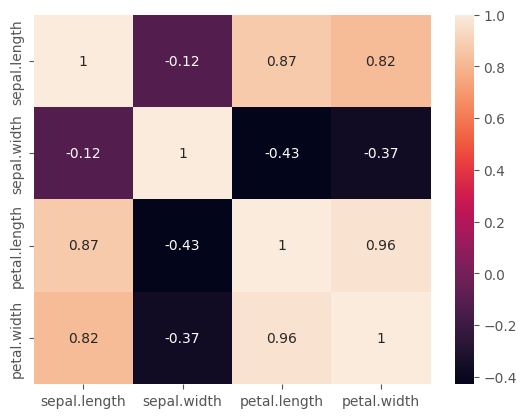

In [ ]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [ ]:
iris = iris.drop(['petal.width'], axis=1)


iris

sepal.length  sepal.width  petal.length    variety
0             5.1          3.5           1.4     Setosa
1             4.9          3.0           1.4     Setosa
2             4.7          3.2           1.3     Setosa
3             4.6          3.1           1.5     Setosa
4             5.0          3.6           1.4     Setosa
..            ...          ...           ...        ...
145           6.7          3.0           5.2  Virginica
146           6.3          2.5           5.0  Virginica
147           6.5          3.0           5.2  Virginica
148           6.2          3.4           5.4  Virginica
149           5.9          3.0           5.1  Virginica

[150 rows x 4 columns]

In [ ]:
iris = iris.drop(['petal.length'], axis=1)
iris

sepal.length  sepal.width    variety
0             5.1          3.5     Setosa
1             4.9          3.0     Setosa
2             4.7          3.2     Setosa
3             4.6          3.1     Setosa
4             5.0          3.6     Setosa
..            ...          ...        ...
145           6.7          3.0  Virginica
146           6.3          2.5  Virginica
147           6.5          3.0  Virginica
148           6.2          3.4  Virginica
149           5.9          3.0  Virginica

[150 rows x 3 columns]